In [82]:
# """
# CORRER SOLO UNA VEZ, ES PARA DESCOMPRIMIR EL ARCHIVO BD.ZIP
# """

# import zipfile
# import os

# # Directorio donde se extraerán los archivos
# current_directory = os.getcwd()
# # Ruta del archivo .zip
# zip_path = os.path.join(current_directory, 'BD.zip')

# # Descomprimir en el directorio actual 
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(current_directory)

# print(f'Archivos extraídos en: {current_directory}')


In [83]:
import cv2
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

directorio_texturas = 'BD'
print(f'Directorio de texturas: {directorio_texturas}')

resultados = []


for folder in sorted(os.listdir(directorio_texturas)):
    
    folder_path = os.path.join(directorio_texturas, folder)
    # print(f"Procesando carpeta: {folder} en la ruta: {folder_path}")
    
    # Verificamos que es una carpeta
    if os.path.isdir(directorio_texturas):
        # print(f"Procesando carpeta: {folder}")
        
        for image_name in os.listdir(folder_path):
            
            image_path = os.path.join(folder_path, image_name)
            print(f"Procesando imagen: {image_name} del folder: {folder}")
            image = cv2.imread(f'{image_path}')
            
            features = ['contrast',
                        'energy',
                        'ASM',
                        'homogeneity',
                        'correlation',
                        'dissimilarity']
            ft_map = {
                "contrast": "Contraste",
                "energy": "Energía",
                "ASM": "ASM",
                "homogeneity": "Homogeneidad",
                "correlation": "Correlación",
                "dissimilarity": "Disimilaridad"}
            
            
            # Para los descriptores de los canales RGB
            image_RBG = cv2.imread(f"{image_path}", cv2.COLOR_BGR2RGB)
            canales = cv2.split(image)
            nombres_canales = ['R', 'G', 'B']
            for canal, nombre_canal in zip(canales, nombres_canales):
                glcm = graycomatrix(canal, 
                                    distances=[1],
                                    angles=[0],
                                    levels=256,
                                    symmetric=False,
                                    normed=False)
                resultados_fila = {
                    'Carpeta': folder,
                    'Canal': nombre_canal,
                    'Imagen': image_name
                }

                for ft in features:
                    if ft in ft_map:
                        ft_values = float(graycoprops(glcm, ft))
                        resultados_fila[ft_map[ft]] = ft_values
                resultados.append(resultados_fila)
                    
            # Para los descriptores de la imagen en escala de grises
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, 
                                distances=[1],
                                angles=[0],
                                levels=256,
                                symmetric=False,
                                normed=False)
            
            resultados_fila = {
                    'Carpeta': folder,
                    'Canal': "gray",
                    'Imagen': image_name
                }

            for ft in features:
                if ft in ft_map:
                    ft_values = float(graycoprops(glcm, ft))
                    resultados_fila[ft_map[ft]] = ft_values
            resultados.append(resultados_fila)
            
            
                
            

            

Directorio de texturas: BD
Procesando imagen: c264-1_1.jpg del folder: textura_01
Procesando imagen: c264-1_10.jpg del folder: textura_01
Procesando imagen: c264-1_11.jpg del folder: textura_01
Procesando imagen: c264-1_12.jpg del folder: textura_01
Procesando imagen: c264-1_13.jpg del folder: textura_01
Procesando imagen: c264-1_14.jpg del folder: textura_01
Procesando imagen: c264-1_15.jpg del folder: textura_01
Procesando imagen: c264-1_16.jpg del folder: textura_01
Procesando imagen: c264-1_17.jpg del folder: textura_01
Procesando imagen: c264-1_18.jpg del folder: textura_01
Procesando imagen: c264-1_19.jpg del folder: textura_01
Procesando imagen: c264-1_2.jpg del folder: textura_01
Procesando imagen: c264-1_20.jpg del folder: textura_01
Procesando imagen: c264-1_21.jpg del folder: textura_01
Procesando imagen: c264-1_22.jpg del folder: textura_01
Procesando imagen: c264-1_23.jpg del folder: textura_01
Procesando imagen: c264-1_24.jpg del folder: textura_01
Procesando imagen: c264

In [84]:


df_resultados = pd.DataFrame(resultados)
display(df_resultados)


,Carpeta,Canal,Imagen,Contraste,Energía,ASM,Homogeneidad,Correlación,Disimilaridad
0,textura_01,R,c264-1_1.jpg,73.323855,0.018066,0.000326,0.169128,0.979387,6.281124
1,textura_01,G,c264-1_1.jpg,73.770297,0.018069,0.000326,0.171021,0.980485,6.277478
2,textura_01,B,c264-1_1.jpg,73.160819,0.018369,0.000337,0.170204,0.979984,6.256659
3,textura_01,gray,c264-1_1.jpg,72.717783,0.018293,0.000335,0.171963,0.980319,6.228369
4,textura_01,R,c264-1_10.jpg,72.781012,0.017860,0.000319,0.173032,0.981427,6.227181
...,...,...,...,...,...,...,...,...,...
1995,textura_10,gray,a642-1_8.jpg,102.051550,0.017143,0.000294,0.155840,0.961583,7.158731
1996,textura_10,R,a642-1_9.jpg,105.441863,0.017695,0.000313,0.158767,0.955224,7.153349
1997,textura_10,G,a642-1_9.jpg,106.592337,0.017137,0.000294,0.157341,0.958782,7.192723
1998,textura_10,B,a642-1_9.jpg,103.988482,0.018870,0.000356,0.160062,0.942124,7.096177


In [85]:
df_resultados.describe()

,Contraste,Energía,ASM,Homogeneidad,Correlación,Disimilaridad
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,124.570150,0.021691,0.000547,0.175369,0.937868,7.436581
std,99.124815,0.008732,0.000479,0.066140,0.051167,3.195505
min,8.765928,0.010264,0.000105,0.064650,0.743754,2.113237
25%,61.940406,0.015960,0.000255,0.130776,0.911276,5.498831
50%,96.161325,0.018391,0.000338,0.170183,0.958652,6.600048
75%,140.911835,0.026483,0.000701,0.223085,0.977053,8.405141
max,485.563165,0.061571,0.003791,0.406928,0.994417,16.601044


Notamos que hay una gran diferencia de escala entre las variables, por lo que necesitamos normalizar

In [86]:
            
from sklearn.preprocessing import StandardScaler
columnas = ["Contraste", "Energía", "ASM", "Homogeneidad", "Correlación", "Disimilaridad"]

scaler = StandardScaler()
df_resultados[columnas] = scaler.fit_transform(df_resultados[columnas])

display(df_resultados)


,Carpeta,Canal,Imagen,Contraste,Energía,ASM,Homogeneidad,Correlación,Disimilaridad
0,textura_01,R,c264-1_1.jpg,-0.517117,-0.415145,-0.459604,-0.094384,0.811658,-0.361679
1,textura_01,G,c264-1_1.jpg,-0.512612,-0.414901,-0.459444,-0.065755,0.833107,-0.362820
2,textura_01,B,c264-1_1.jpg,-0.518762,-0.380546,-0.436645,-0.078117,0.823316,-0.369337
3,textura_01,gray,c264-1_1.jpg,-0.523233,-0.389241,-0.442451,-0.051514,0.829879,-0.378192
4,textura_01,R,c264-1_10.jpg,-0.522595,-0.438792,-0.475077,-0.035345,0.851535,-0.378564
...,...,...,...,...,...,...,...,...,...
1995,textura_10,gray,a642-1_8.jpg,-0.227231,-0.520956,-0.527457,-0.295340,0.463603,-0.086972
1996,textura_10,R,a642-1_9.jpg,-0.193020,-0.457714,-0.487331,-0.251081,0.339282,-0.088657
1997,textura_10,G,a642-1_9.jpg,-0.181411,-0.521575,-0.527843,-0.272641,0.408850,-0.076332
1998,textura_10,B,a642-1_9.jpg,-0.207686,-0.323067,-0.397661,-0.231501,0.083207,-0.106553


In [87]:
# pip install mlxtend

In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

X = df_resultados[columnas]
y = df_resultados['Carpeta']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA maximiza el índice de Fisher
lda = LDA()

best_k_features = None
best_accuracy = 0
best_selected_features = None

# Plus L = 2 y Take Away R = 1
L = 2 
R = 1 

current_k = L

iter_caract = []

# Ciclo de Plus L, Take Away R
while current_k <= 6:  # Definir un máximo de características seleccionadas (6)
    print(f"Prueba de {current_k} características iniciales (SFS)")

    # Vamos agregando características (Plus L)
    sfs = SFS(lda, 
              k_features=current_k,  # Vamos cambiando el número de características de forma creciente para encontrar el mejor
              forward=True, 
              floating=False, 
              scoring='accuracy', 
              cv=5)  # Validación cruzada
    
    sfs = sfs.fit(X_train, y_train)

    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Entrenamos y predecimos
    lda.fit(X_train_sfs, y_train)
    y_pred_sfs = lda.predict(X_test_sfs)

    # Calcularmos accuracy como medida de desempeño
    test_accuracy_sfs = accuracy_score(y_test, y_pred_sfs)

    selected_feature_names = list(sfs.k_feature_names_)

    print(f"Características seleccionadas con SFS: {selected_feature_names}")
    print(f"Precisión de validación cruzada con SFS: {sfs.k_score_}")
    print(f"Precisión en conjunto de prueba con SFS: {test_accuracy_sfs}")


    X_train_numpy = X_train.to_numpy() # para poder seleccionar solo las columnas de SFS en las siguientes lineas (X_train_sfs_subset y X_test_sfs_subset)
    X_test_numpy = X_test.to_numpy()

    # Aplicamos SBS sobre las características seleccionadas por SFS
    selected_features_indices = list(sfs.k_feature_idx_)
    X_train_sfs_subset = X_train_numpy[:, selected_features_indices]  # Subset con las características seleccionadas por SFS
    X_test_sfs_subset = X_test_numpy[:, selected_features_indices]   
    
    sbs = SFS(lda,
              k_features=(current_k - R),  # Reducimos el número de características en R cada vez
              forward=False,  # Ahora hacemos SBS
              floating=False, 
              scoring='accuracy', 
              cv=5)

    sbs = sbs.fit(X_train_sfs_subset, y_train)

    X_train_sbs = sbs.transform(X_train_sfs_subset)
    X_test_sbs = sbs.transform(X_test_sfs_subset)

    # Entrenamos y predecimos con el modelo ajustado por SBS
    lda.fit(X_train_sbs, y_train)
    y_pred_sbs = lda.predict(X_test_sbs)

    # Recalculamos accuracy con SBS
    test_accuracy_sbs = accuracy_score(y_test, y_pred_sbs)

    # Mapear los índices de SBS a los nombres de las características originales
    sbs_feature_indices = list(sbs.k_feature_idx_)
    sbs_feature_names = [selected_feature_names[i] for i in sbs_feature_indices]

    print(f"Características seleccionadas con SBS (después de SFS): {sbs_feature_names}")
    print(f"Precisión de validación cruzada con SBS: {sbs.k_score_}")
    print(f"Precisión en conjunto de prueba con SBS: {test_accuracy_sbs}")


    # Guardamos los resultados de la iteración en un diccionario
    iter_caract.append({
        'k_features': current_k,
        'selected_features_sfs': sfs.k_feature_names_,
        'selected_features_sbs': sbs.k_feature_names_,
        'cross_val_score_sfs': sfs.k_score_,
        'cross_val_score_sbs': sbs.k_score_,
        'test_accuracy_sfs': test_accuracy_sfs,
        'test_accuracy_sbs': test_accuracy_sbs
    })

    # Vamos comparando y guardamos el mejor resultado entre SFS + SBS
    if test_accuracy_sbs > best_accuracy:
        best_k_features = current_k
        best_accuracy = test_accuracy_sbs
        best_selected_features = sbs_feature_names

    print("-" * 50)

    # Siguiente iteración +L (plus L)
    current_k += L
    





Prueba de 2 características iniciales (SFS)
Características seleccionadas con SFS: ['Contraste', 'Correlación']
Precisión de validación cruzada con SFS: 0.7137499999999999
Precisión en conjunto de prueba con SFS: 0.6975
Características seleccionadas con SBS (después de SFS): ['Correlación']
Precisión de validación cruzada con SBS: 0.403125
Precisión en conjunto de prueba con SBS: 0.3475
--------------------------------------------------
Prueba de 4 características iniciales (SFS)
Características seleccionadas con SFS: ['Contraste', 'Energía', 'Homogeneidad', 'Correlación']
Precisión de validación cruzada con SFS: 0.8300000000000001
Precisión en conjunto de prueba con SFS: 0.825
Características seleccionadas con SBS (después de SFS): ['Contraste', 'Homogeneidad', 'Correlación']
Precisión de validación cruzada con SBS: 0.809375
Precisión en conjunto de prueba con SBS: 0.8
--------------------------------------------------
Prueba de 6 características iniciales (SFS)
Características selecc

In [89]:
# Resultados finales
print(f"Mejor número de características: {len(best_selected_features)}")
print(f"Mejor precisión: {best_accuracy}")
print(f"Mejores características seleccionadas: {best_selected_features}")

Mejor número de características: 3
Mejor precisión: 0.8
Mejores características seleccionadas: ['Contraste', 'Homogeneidad', 'Correlación']


In [90]:
columnas_red_dim = ['Carpeta', 'Canal', 'Imagen'] + best_selected_features
df_red_dim = df_resultados[columnas_red_dim]
display(df_red_dim)

,Carpeta,Canal,Imagen,Contraste,Homogeneidad,Correlación
0,textura_01,R,c264-1_1.jpg,-0.517117,-0.094384,0.811658
1,textura_01,G,c264-1_1.jpg,-0.512612,-0.065755,0.833107
2,textura_01,B,c264-1_1.jpg,-0.518762,-0.078117,0.823316
3,textura_01,gray,c264-1_1.jpg,-0.523233,-0.051514,0.829879
4,textura_01,R,c264-1_10.jpg,-0.522595,-0.035345,0.851535
...,...,...,...,...,...,...
1995,textura_10,gray,a642-1_8.jpg,-0.227231,-0.295340,0.463603
1996,textura_10,R,a642-1_9.jpg,-0.193020,-0.251081,0.339282
1997,textura_10,G,a642-1_9.jpg,-0.181411,-0.272641,0.408850
1998,textura_10,B,a642-1_9.jpg,-0.207686,-0.231501,0.083207


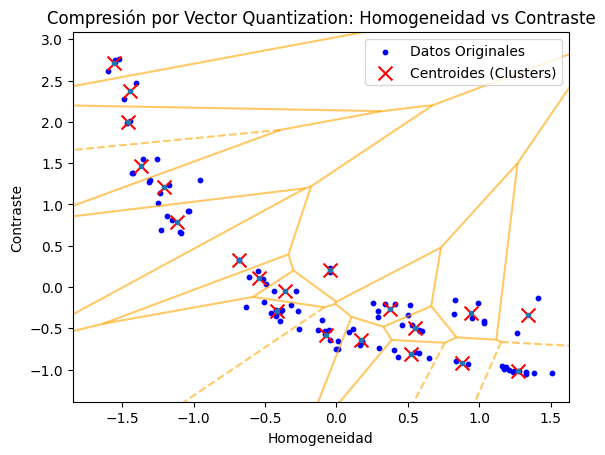

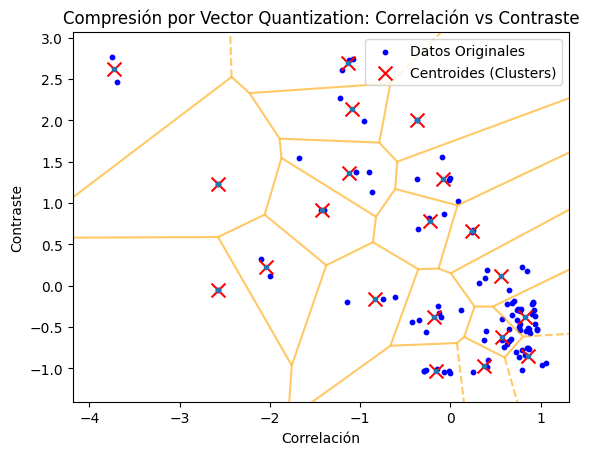

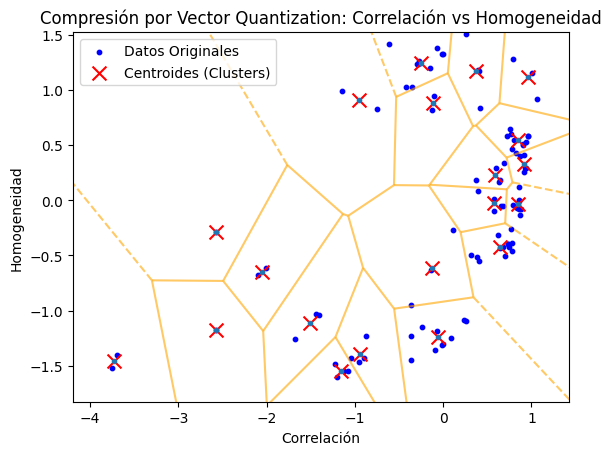

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d

# Definir el número de muestras a reducir
num_muestras = 100

df_muestra = df_resultados.sample(n=num_muestras, random_state=42)

# Definir el número de clusters (centroides) para la compresión por VQ
num_clusters = 20


def graficar_voronoi(caracteristicas, x_label, y_label, titulo):
    # Aplicar el algoritmo KMeans para la compresión VQ
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(caracteristicas)

    # Obtener los centroides
    centroides = kmeans.cluster_centers_

    # Graficar los centroides y los datos originales
    plt.scatter(caracteristicas[:, 0], caracteristicas[:, 1], s=10, c='blue', label='Datos Originales')
    plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='red', marker='x', label='Centroides (Clusters)')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(titulo)

    # Calcular el diagrama de Voronoi y graficarlo
    vor = Voronoi(centroides)
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5, line_alpha=0.6)

    plt.show()
    
for i, caracteristica in enumerate(best_selected_features):
    for j, caracteristica2 in enumerate(best_selected_features):
        if i <= j:
            continue
        caracteristicas = df_muestra[[caracteristica, caracteristica2]].values
        graficar_voronoi(caracteristicas, caracteristica, caracteristica2, f"Compresión por Vector Quantization: {caracteristica} vs {caracteristica2}")
    